In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
tf.__version__

'2.19.0'

In [3]:
import sklearn
sklearn.__version__

'1.6.0'

# 신경망 모델 훈련

**[핵심키워드]** 손실곡선, 드롭아웃(dropout), 콜백(callback), 조기종료  

- 인공신경망 모델을 훈련하는 모범 사례와 필요한 도구 학습

In [4]:
from tensorflow import keras
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

### 데이터 준비

In [5]:
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()

In [6]:
train_scaled = train_input/255
test_scaled = test_input/255

X_train, X_val, y_train, y_val = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [7]:
X_train.shape

(48000, 28, 28)

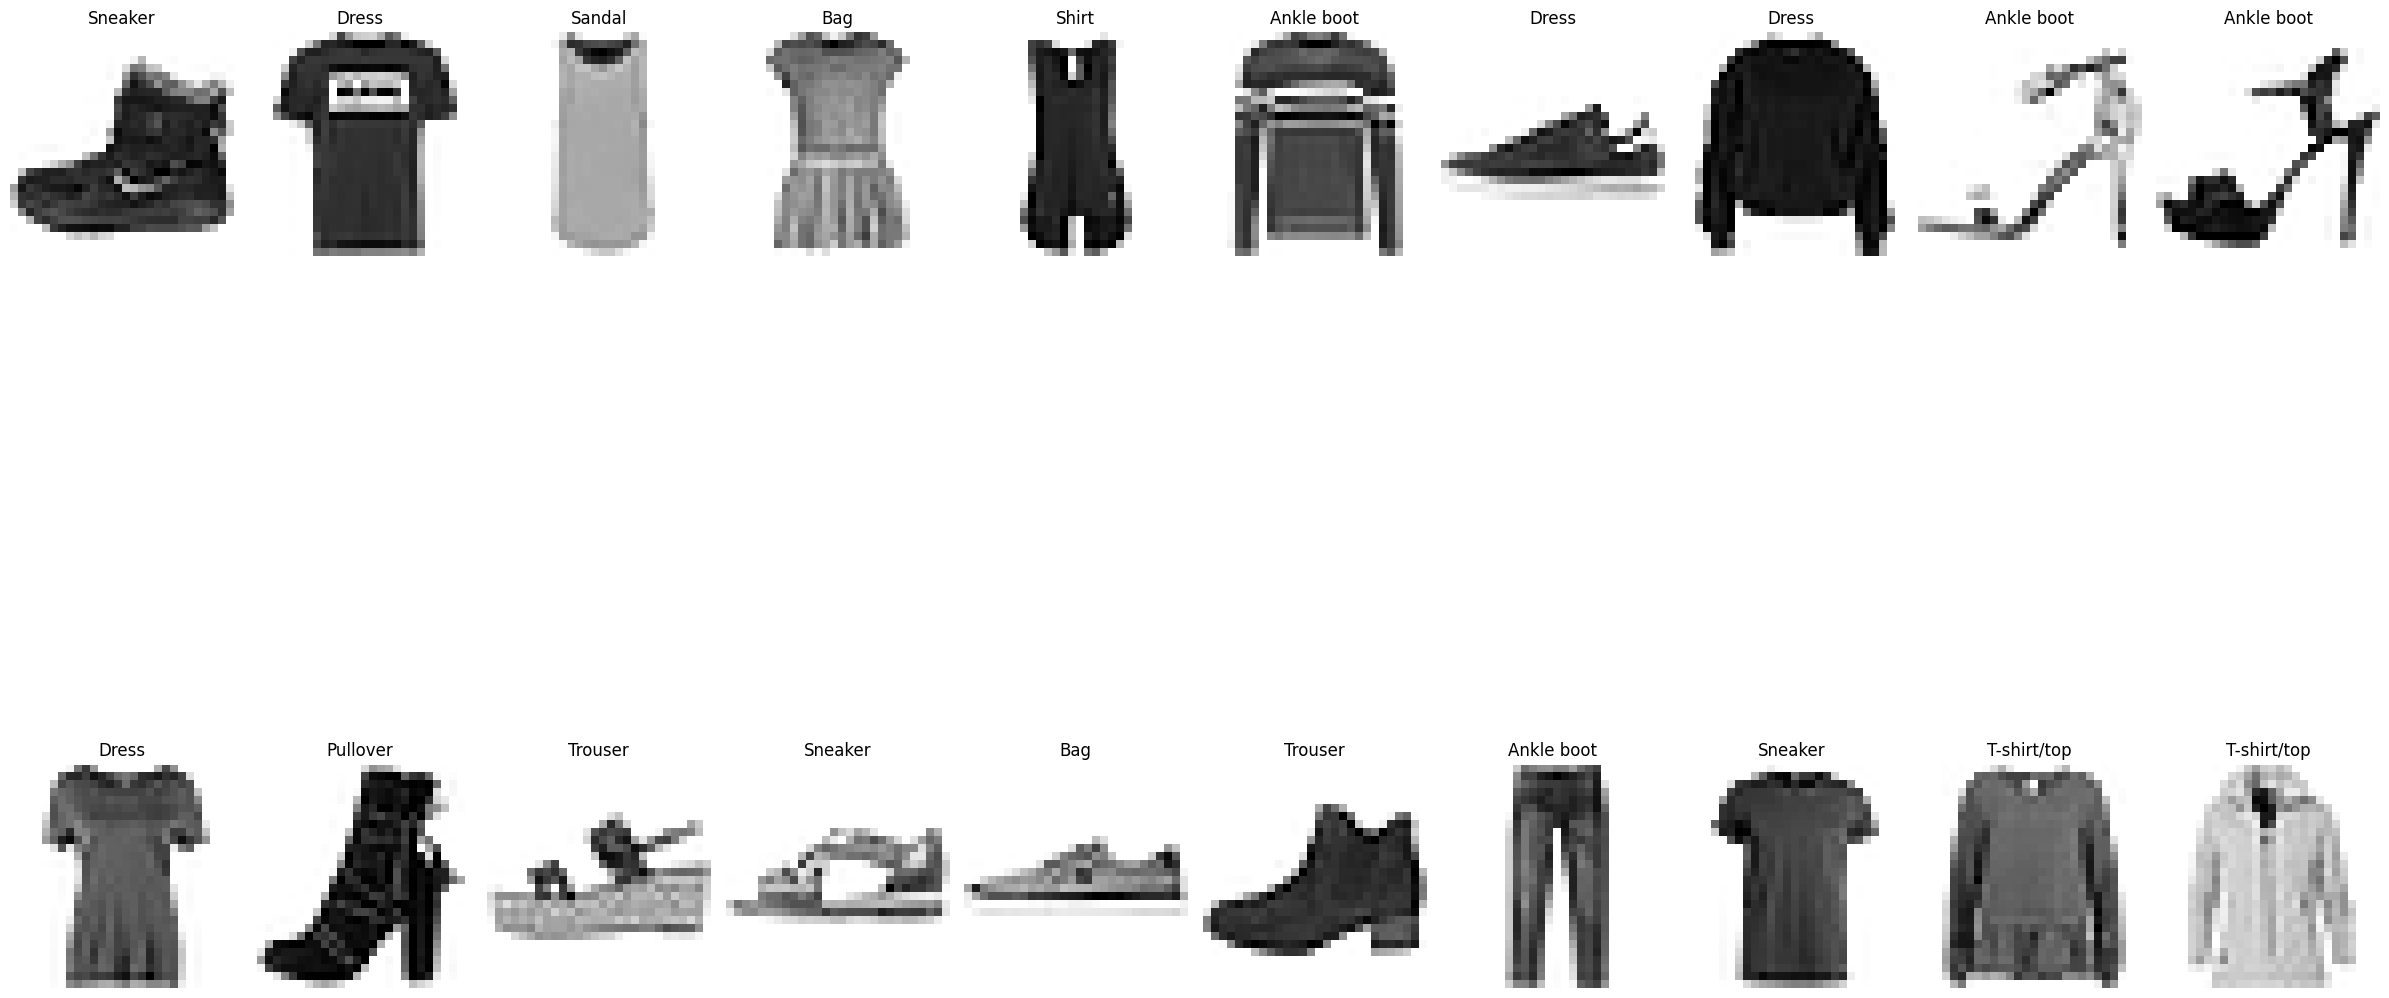

In [8]:
target_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
                'Sandal','Shirt','Sneaker','Bag','Ankle boot']
fig, axs = plt.subplots(figsize=(24,20), nrows=2, ncols=10)
for i in range(20):
    r, c = i//10, i%10
    img, label = X_train[i], y_train[i]
    axs[r][c].imshow(train_input[i], cmap=plt.cm.binary)
    axs[r][c].axis('off')
    axs[r][c].set_title(target_names[label])
plt.tight_layout()
plt.show()

### 모델 생성 함수 정의

: 함수의 a_layer 매개변수는 케라스 층으로서, 은닉층 뒤에 층을 추가하는 함수

In [9]:
from keras import Sequential 
from keras.layers import Dense, Input, Flatten

def build_model(a_layer=None):
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(Dense(10, activation='softmax'))
    return model

### 모델 생성하고 모델의 정보 출력

In [10]:
model = build_model()
model.summary()

C:\ProgramData\anaconda3\envs\tensor\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

### 모델 컴파일 및 훈련
: 훈련된 모델 객체를 변수 history에 저장  

In [11]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8127 - loss: 0.5299
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8582 - loss: 0.3923
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8725 - loss: 0.3537
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8811 - loss: 0.3298
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8856 - loss: 0.3162


- history 객체는 딕셔너리 형식으로 훈련 측정값이 저장되어 있음
    - loss와 accuracy : 에포크마다 계산한 값이 순서대로 리스트에 저장

In [12]:
history.history['accuracy']

[0.81270831823349,
 0.8581666946411133,
 0.8725416660308838,
 0.8811041712760925,
 0.8856250047683716]

In [13]:
history.history['loss']

[0.5299496054649353,
 0.3922818601131439,
 0.3537144362926483,
 0.32978034019470215,
 0.31623464822769165]

## 손실 곡선

### history 속성에 포함된 손실(loss)과 정확도(accuracy) 시각화

In [14]:
def draw_loss_metric_plot(history):
    plt.figure(figsize=(10,5))
    for i, item in enumerate(history. history.keys()):
        plt.subplot(1,2,i+1)
        n = len(history.history[item])
        plt.plot(range(1, n+1), history.history[item], label=item)
        plt.xlabel('epoch')
        plt.ylabel(item)
        plt.title(f'{item} plot')
        plt.legend()
    plt.show()

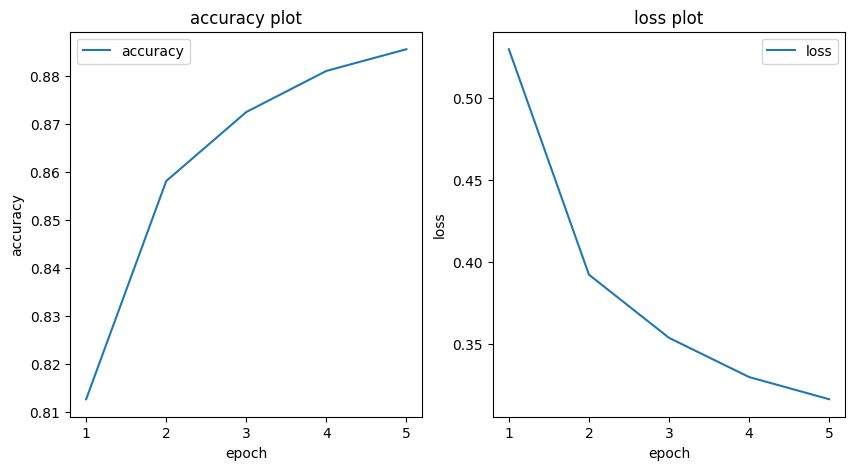

In [15]:
draw_loss_metric_plot(history)

In [16]:
print('epoch=5일때')
for item in history.history.keys():
    print(f'{item}:{history.history[item][-1]:.4f}', end=' ')
print()

epoch=5일때
accuracy:0.8856 loss:0.3162 


### epochs=20 인 경우 모델 훈련 후 loss 값 시각화

In [17]:
model2 = build_model()
model2.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8151 - loss: 0.5329
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8590 - loss: 0.3905
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8714 - loss: 0.3535
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8807 - loss: 0.3318
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8855 - loss: 0.3162
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8918 - loss: 0.3055
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8947 - loss: 0.2960
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8977 - loss: 0.2867
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9015 - loss: 0.2788
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9034 - loss: 0.2720
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9060 - loss: 0.2677
Epoch 12/20
1500/1500 ━━━━━━━━

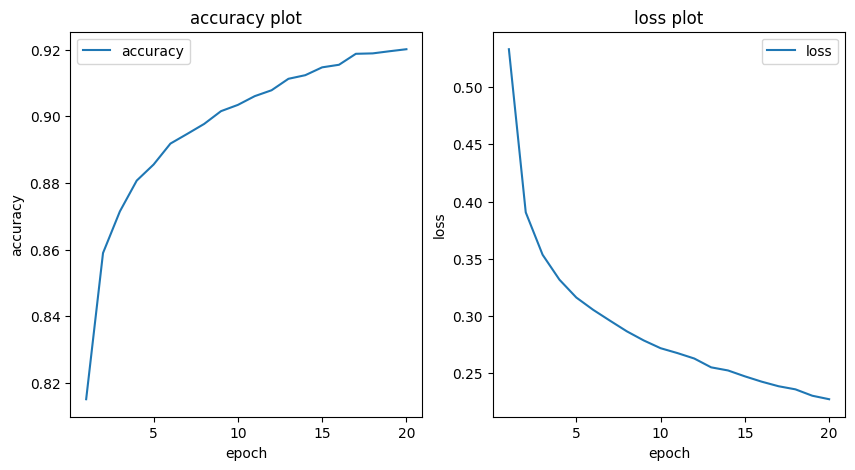

epoch=20일때
accuracy:0.8856 loss:0.3162 


In [18]:
draw_loss_metric_plot(history2)
print('epoch=20일때')
for item in history.history.keys():
    print(f'{item}:{history.history[item][-1]:.4f}', end=' ')
print()

#### [문제1] epochs=40으로 학습한 경우 accuracy, loss값을 그래프로 그려보시오

In [19]:
model3 = build_model()
model3.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=40)

Epoch 1/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8109 - loss: 0.5361
Epoch 2/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8581 - loss: 0.3926
Epoch 3/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8723 - loss: 0.3556
Epoch 4/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8808 - loss: 0.3327
Epoch 5/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8871 - loss: 0.3168  
Epoch 6/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8907 - loss: 0.3065
Epoch 7/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8952 - loss: 0.2954
Epoch 8/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8962 - loss: 0.2887
Epoch 9/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9012 - loss: 0.2792
Epoch 10/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9034 - loss: 0.2727
Epoch 11/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9050 - loss: 0.2673
Epoch 12/40
1500/1500 ━━━━━━

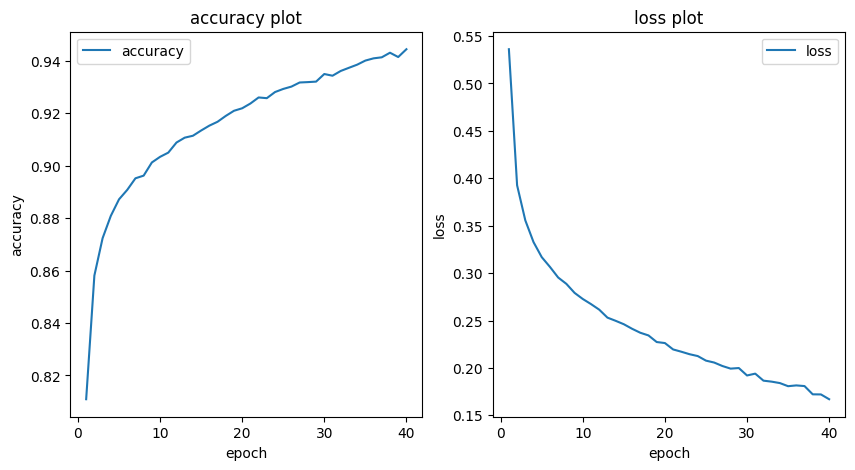

epoch=40일때
accuracy:0.8856 loss:0.3162 


In [20]:
draw_loss_metric_plot(history3)
print('epoch=40일때')
for item in history.history.keys():
    print(f'{item}:{history.history[item][-1]:.4f}', end=' ')
print()

## 검증 손실

- 에포크에 따라 과대적합과 과소적합이 달라짐
- 인공신경망 모델이 최적화하는 대상을 정확도가 아니라 손실함수
    - 손실감소에 비례하여 정확도가 높아지지 않는 경우도 있음
    - 모델이 잘 훈련되었는지 판단하기 위해서는 정확도보다는 손실함수의 값을 확인

#### 에포크마다 검증 손실 계산
- fit() 메서드의 **validation_data** 매개변수에 검증 데이터를 전달
- 검증할 입력과 타깃값은 튜플로 전달

#### 검증데이터에 대한 손실과 정확도는 val_loss, val_accuracy에 저장

In [21]:
def draw_loss_val_plot(history):
    acc = ['accuracy', 'val_accuracy']
    loss = ['loss', 'val_loss']
    title = ['Loss', 'Accuracy']
    plt.figure(figsize=(10,5))
    for i, item in enumerate([loss, acc]):
        plt.subplot(1,2,i+1)
        n = len(history.history[item[0]])
        plt.plot(range(1, n+1), history.history[item[0]], label=item[0])
        plt.plot(range(1, n+1), history.history[item[1]], label=item[1])
        
        plt.xlabel('epoch')
        plt.ylabel(title[i])
        plt.title(f'{title[i]} plot')
        plt.legend()
    plt.show()

#### 훈련데이터와 검증데이터에 대한 손실과 정확도 시각화

In [22]:
model4 = build_model()
model4.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8121 - loss: 0.5298 - val_accuracy: 0.8522 - val_loss: 0.4086
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8592 - loss: 0.3903 - val_accuracy: 0.8506 - val_loss: 0.4051
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8715 - loss: 0.3533 - val_accuracy: 0.8679 - val_loss: 0.3730
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8808 - loss: 0.3325 - val_accuracy: 0.8773 - val_loss: 0.3458
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8858 - loss: 0.3173 - val_accuracy: 0.8762 - val_loss: 0.3588
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8901 - loss: 0.3051 - val_accuracy: 0.8807 - val_loss: 0.3524
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8934 - loss: 0.2945 - val_accuracy: 0.8668 - val_loss: 0.4048
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8991 - loss: 0.2868 - 

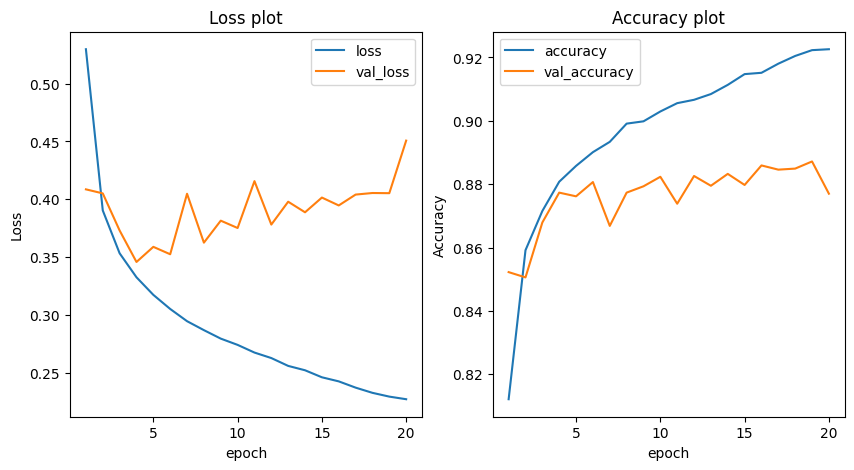

epoch=20일때
accuracy:0.9226 loss:0.2271 val_accuracy:0.8770 val_loss:0.4507 


In [23]:
draw_loss_val_plot(history4)
print('epoch=20일때')
for item in history4.history.keys():
    print(f'{item}:{history4.history[item][-1]:.4f}', end=' ')
print()

#### Adam 옵티마이저를 이용한 모델의 훈련 손실과 검증 손실

In [24]:
model5 = build_model()
model5.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history5 = model5.fit(X_train, y_train, epochs=20, verbose=0, validation_data=(X_val, y_val))

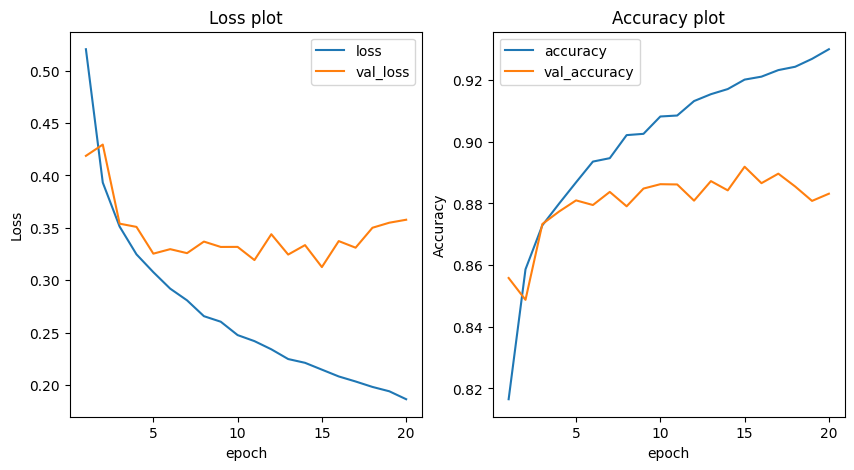

optimizer="adam", epoch=20일때
accuracy:0.9300 loss:0.1866 val_accuracy:0.8832 val_loss:0.3577 


In [25]:
draw_loss_val_plot(history5)
print('optimizer="adam", epoch=20일때')
for item in history5.history.keys():
    print(f'{item}:{history5.history[item][-1]:.4f}', end=' ')
print()

[결과]
- Adam옵티마이져가 RMSprop 옵티마이져보다 과대적합이 많이 줄어듬
- 검증손실 및 정확도는 14번째 에포크까지 감소하다가 다시 늘어남

In [26]:
def fmnist_modeling(X_train, y_train, X_val, y_val, optimizer='rmsprop', epochs=20):
    model = build_model()
    model.compile(optimizer=optimizer,
                   loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))
    print(f'optimizer={optimizer}, epochs={epochs}일때')
    for item in history.history.keys():
        print(f'{item}:{history.history[item][-1]:.4f}', end=' ')
    print()
    draw_loss_val_plot(history)
    return model

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8118 - loss: 0.5340 - val_accuracy: 0.8599 - val_loss: 0.4039
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8572 - loss: 0.3939 - val_accuracy: 0.8541 - val_loss: 0.4164
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8728 - loss: 0.3562 - val_accuracy: 0.8689 - val_loss: 0.3695
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8805 - loss: 0.3304 - val_accuracy: 0.8768 - val_loss: 0.3534
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8871 - loss: 0.3172 - val_accuracy: 0.8785 - val_loss: 0.3577
optimizer=rmsprop, epochs=5일때
accuracy:0.8871 loss:0.3172 val_accuracy:0.8785 val_loss:0.3577 


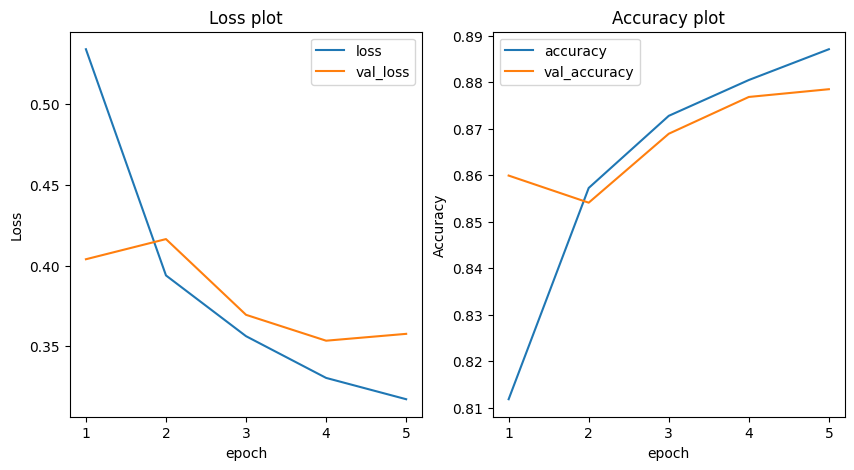

<Sequential name=sequential_5, built=True>

In [27]:
fmnist_modeling(X_train, y_train, X_val, y_val, optimizer='rmsprop', epochs=5)

#### [문제2] 앞의 신경망 모델에 대하여 학습률을 조정하여 변화되는 손실 곡선을 그려보시오.

- RMSprop(learning_rate=0.05)인 경우

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8093 - loss: 0.5497 - val_accuracy: 0.8397 - val_loss: 0.4701
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8531 - loss: 0.4123 - val_accuracy: 0.8547 - val_loss: 0.4026
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8679 - loss: 0.3715 - val_accuracy: 0.8679 - val_loss: 0.3743
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8755 - loss: 0.3482 - val_accuracy: 0.8644 - val_loss: 0.3868
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8812 - loss: 0.3287 - val_accuracy: 0.8722 - val_loss: 0.3582
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8864 - loss: 0.3141 - val_accuracy: 0.8738 - val_loss: 0.3582
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8904 - loss: 0.3013 - val_accuracy: 0.8772 - val_loss: 0.3475
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8954 - loss: 0.2921 - 

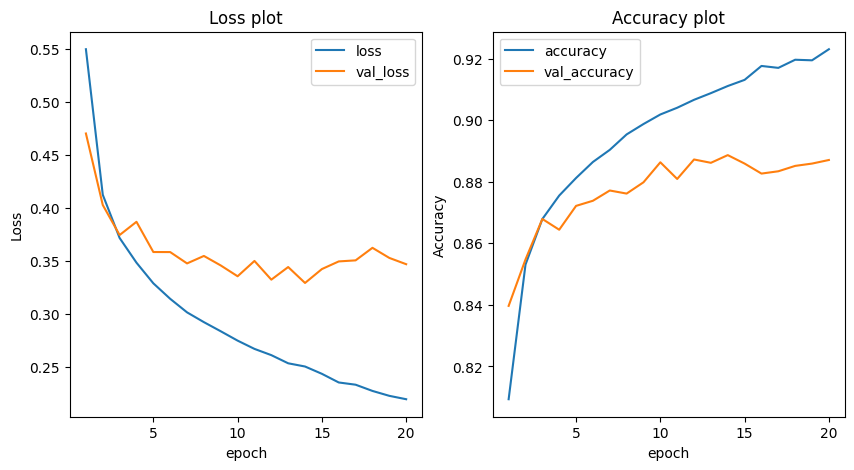

<Sequential name=sequential_6, built=True>

In [28]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0005)
fmnist_modeling(X_train, y_train, X_val, y_val, optimizer=rmsprop, epochs=20)

- Adam(learning_rate=0.0005)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8081 - loss: 0.5651 - val_accuracy: 0.8338 - val_loss: 0.4687
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8530 - loss: 0.4177 - val_accuracy: 0.8631 - val_loss: 0.3951
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8668 - loss: 0.3752 - val_accuracy: 0.8699 - val_loss: 0.3681
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8768 - loss: 0.3475 - val_accuracy: 0.8715 - val_loss: 0.3576
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8817 - loss: 0.3278 - val_accuracy: 0.8714 - val_loss: 0.3570
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8871 - loss: 0.3134 - val_accuracy: 0.8755 - val_loss: 0.3451
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8913 - loss: 0.2985 - val_accuracy: 0.8757 - val_loss: 0.3500
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8950 - loss: 0.2856 - 

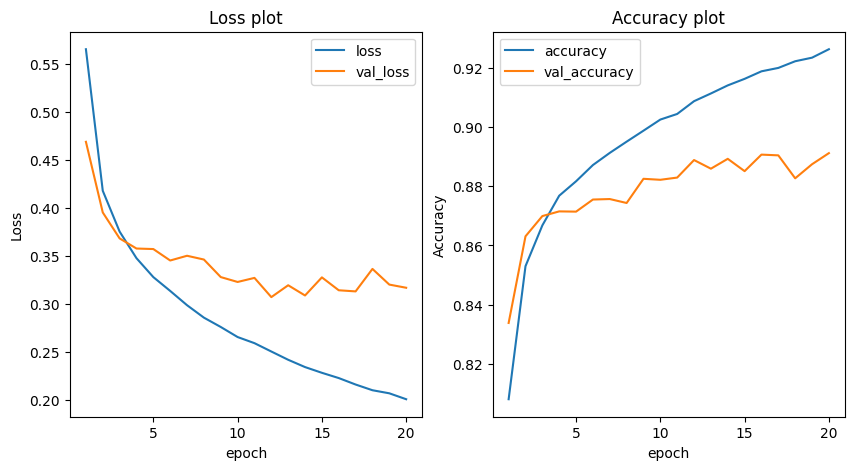

<Sequential name=sequential_7, built=True>

In [29]:
adam = keras.optimizers.Adam(learning_rate=0.0005)
fmnist_modeling(X_train, y_train, X_val, y_val, optimizer=adam, epochs=20)

=> 옵티마이저의 학습률(learning_rate)의 크기가 모델의 성능에 영향을 줌

- Adam(learning_rate=0.0005) & epochs=40

Epoch 1/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8044 - loss: 0.5744 - val_accuracy: 0.8389 - val_loss: 0.4575
Epoch 2/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8517 - loss: 0.4235 - val_accuracy: 0.8571 - val_loss: 0.4005
Epoch 3/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8635 - loss: 0.3837 - val_accuracy: 0.8572 - val_loss: 0.4099
Epoch 4/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8741 - loss: 0.3557 - val_accuracy: 0.8670 - val_loss: 0.3866
Epoch 5/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8806 - loss: 0.3324 - val_accuracy: 0.8788 - val_loss: 0.3458
Epoch 6/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8857 - loss: 0.3165 - val_accuracy: 0.8685 - val_loss: 0.3606
Epoch 7/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8924 - loss: 0.3009 - val_accuracy: 0.8752 - val_loss: 0.3519
Epoch 8/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8946 - loss: 0.2892 - 

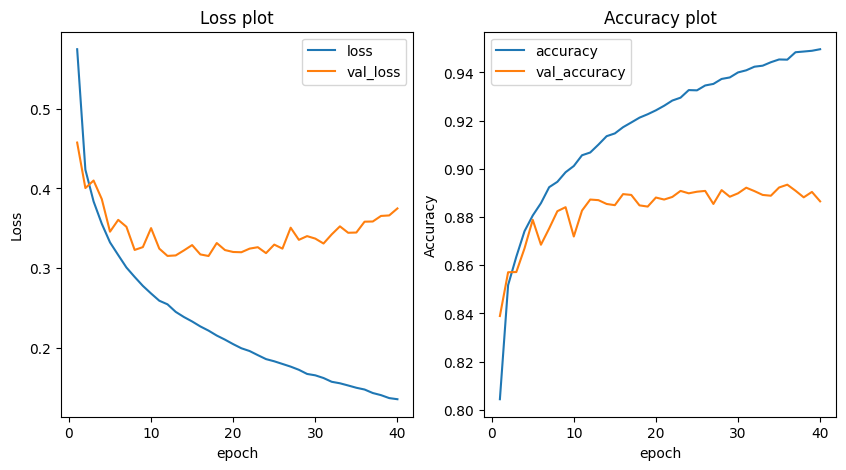

<Sequential name=sequential_8, built=True>

In [30]:
adam = keras.optimizers.Adam(learning_rate=0.0005)
fmnist_modeling(X_train, y_train, X_val, y_val, optimizer=adam, epochs=40)

---

## 드롭아웃(dropout)

: 딥러닝의 아버지로 불리는 제프리 힌턴(Geoffrey  Hinton)이 소개한 개념
- 은닉층에서 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법
- 훈련 중에 적용되며 평가나 예측에서는 적용되지 않음
- 텐서플로는 이를 자동으로 처리

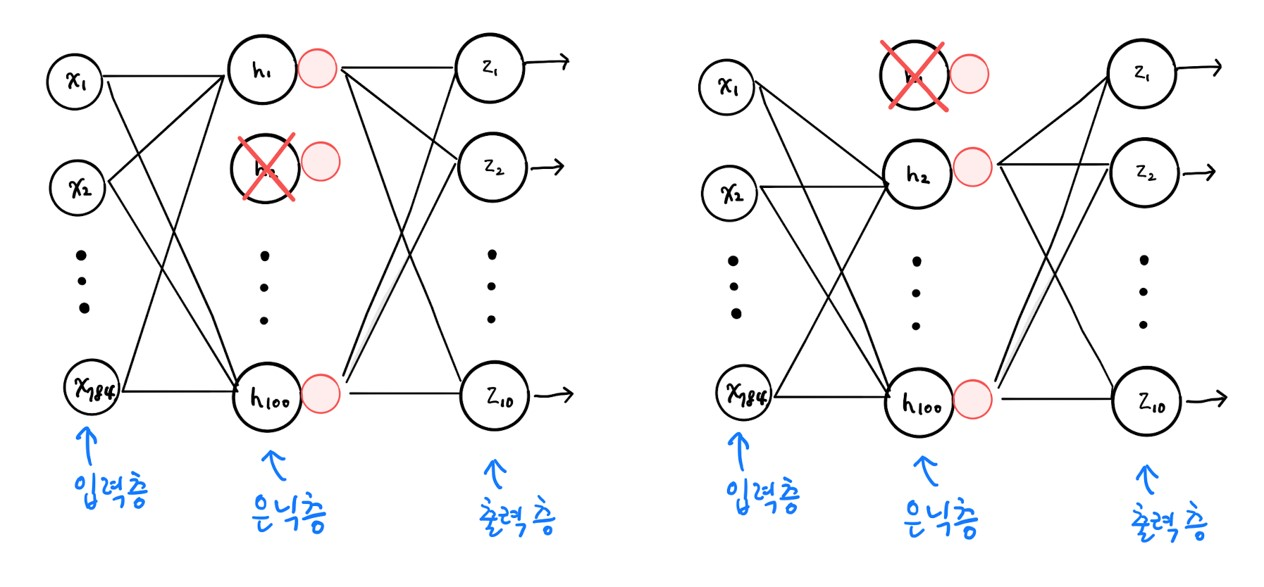

#### 드롭아웃이 과대적합을 막는 이유?

- 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고, 모든 입력에 대해 주의를 기울여야 함 

#### Dropout 클래스

- keras.layres 패키지 아래 제공
    - keras.layers.Dropout(드롭아웃비율)  
    - 드롭아웃하지 않는 뉴런의 출력은 $1/(1-r)$ 만큼 증가시켜 출력의 총합이 같도록 만듬

- 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만듬

In [31]:
# 30% 정도 드롭아웃
drop = keras.layers.Dropout(0.3)
model = build_model(drop)
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- 은닉층 뒤에 추가된 드롭아웃층은 훈련되는 모델 파라미터가 없고, 드롭아웃비율만 있음
- 드롭아웃 층이 입력과 출력의 크기가 같음
- 일부 뉴런의 출력을 0으로 만들지만 전체 출력의 배열의 크기는 바꾸지 않음
- 훈련이 끝난 뒤에 평가나 예측을 수행할 때는 드롭아웃을 적용하지 말아야 함
- 텐서플로(케라스)는 모델평가와 예측에서는 자동으로 드롭아웃을 적용하지 않음

#### 드롭아웃이 적용된 모델의 훈련 손실과 검증 손실 그래프

In [32]:
def fmnist_modeling(X_train, y_train, X_val, y_val, optimizer='rmsprop', epochs=20, dropout=None):
    if dropout is not None:
        drop_layer = keras.layers.Dropout(dropout)
        model = build_model(drop_layer)
    else:
        model = build_model()
    model.compile(optimizer=optimizer,
                   loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))
    print(f'optimizer={optimizer}, epochs={epochs}일때')
    for item in history.history.keys():
        print(f'{item}:{history.history[item][-1]:.4f}', end=' ')
    print()
    draw_loss_val_plot(history)
    return model

Dropout=0.3 적용
Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7950 - loss: 0.5824 - val_accuracy: 0.8472 - val_loss: 0.4234
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8418 - loss: 0.4384 - val_accuracy: 0.8544 - val_loss: 0.3892
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8542 - loss: 0.4026 - val_accuracy: 0.8692 - val_loss: 0.3622
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8608 - loss: 0.3811 - val_accuracy: 0.8716 - val_loss: 0.3553
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8650 - loss: 0.3674 - val_accuracy: 0.8755 - val_loss: 0.3459
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8701 - loss: 0.3520 - val_accuracy: 0.8766 - val_loss: 0.3373
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8733 - loss: 0.3423 - val_accuracy: 0.8770 - val_loss: 0.3382
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8765 - 

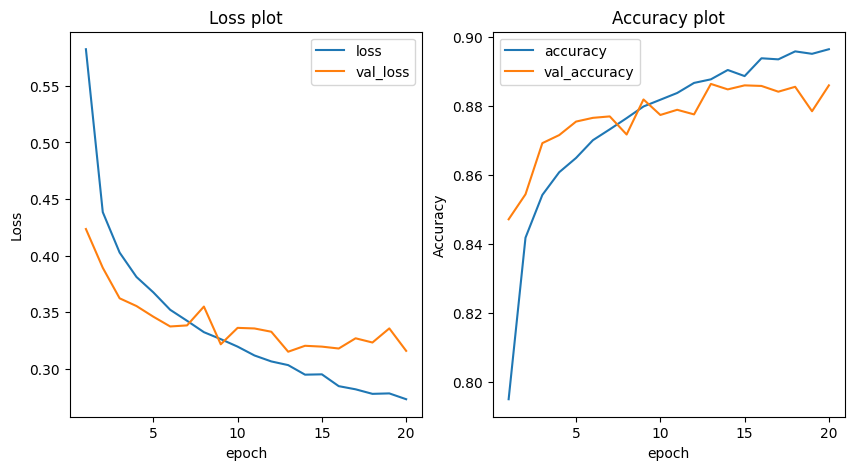

<Sequential name=sequential_10, built=True>

In [33]:
adam = keras.optimizers.Adam(learning_rate=0.001)
print('Dropout=0.3 적용')
fmnist_modeling(X_train, y_train, X_val, y_val, optimizer=adam, epochs=20, dropout=0.3)

=> 드롭아웃 층을 넣으므로써 과적합을 줄이는 효과가 있음

딥러닝에서 드롭아웃은 **과적합을 방지**하고, 모델의 **일반화 성능 향상**을 위한 강력한 정규화(Regularization) 기법
- 무작위 뉴런(유닛) 비활성화 : 은닉층에 있는 일부 뉴런을 일정 확률로 무작위로 선택하여 제거(비활성화)함. 제거된 뉴런과 연결된 모든 가중치로 함께 제거됨
- 특정 뉴런의존 방지 효과 : 특정 뉴런이나 경로(network)에 지나치게 의존하여 학습 데이터의 특정 패턴에만 맞춰지는 현상(과적합)을 방지
- 매 학습단계마다 은닉층의 뉴런(유닛)이 다르게 선택되므로 다양한 신경망 구조들을 이용하는 앙상블 학습효과를 얻을 수 있음

## 모델 저장과 복원

#### 에포크 횟수를 10으로 지정하고 모델을 훈련

Dropout=0.3 적용
Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7905 - loss: 0.5921 - val_accuracy: 0.8408 - val_loss: 0.4356
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8420 - loss: 0.4378 - val_accuracy: 0.8612 - val_loss: 0.3804
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8532 - loss: 0.4053 - val_accuracy: 0.8639 - val_loss: 0.3666
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8611 - loss: 0.3817 - val_accuracy: 0.8698 - val_loss: 0.3565
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8676 - loss: 0.3661 - val_accuracy: 0.8720 - val_loss: 0.3454
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8710 - loss: 0.3530 - val_accuracy: 0.8737 - val_loss: 0.3420
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8736 - loss: 0.3428 - val_accuracy: 0.8725 - val_loss: 0.3454
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8764 - 

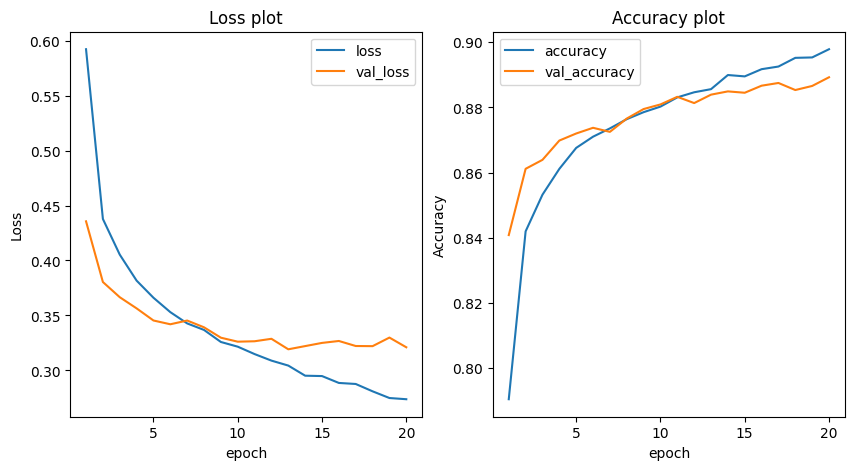

In [34]:
adam = keras.optimizers.Adam(learning_rate=0.001)
print('Dropout=0.3 적용')
model = fmnist_modeling(X_train, y_train, X_val, y_val, optimizer=adam, epochs=20, dropout=0.3)

#### 훈련된 모델의 파라미터를 저장 : save_weights() 메서드  
- 텐서플로의 체크포인트 포맷 또는 HDF5 포맷인 .h5 파일로 저장  

In [35]:
model_path = 'model/'
model.save_weights(model_path+'model.weights.h5')

#### 훈련된 모델 구조와 파라미터를 함께 저장 : model.save() 메서드   

- 텐서플로의 SavedModel 포맷 또는 HDF5 포맷인 .h5 파일로 저장, 권장은 .keras로 저장할 것 권장 

In [36]:
model.save(model_path+'model_whole.h5')

In [37]:
model.save(model_path+'model_whole.keras')

#### 저장된 파일들 확인

In [38]:
%cd model
%ls
%cd ..
%ls
        

C:\Users\user\model
 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 141E-601F

 C:\Users\user\model 디렉터리

2025-11-05  오전 11:53    <DIR>          .
2025-11-05  오전 11:52    <DIR>          ..
2025-11-05  오전 11:53           976,600 model.weights.h5
2025-11-05  오전 11:53           978,584 model_whole.h5
2025-11-05  오전 11:53           978,955 model_whole.keras
               3개 파일           2,934,139 바이트
               2개 디렉터리  46,086,381,568 바이트 남음
C:\Users\user
 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 141E-601F

 C:\Users\user 디렉터리

2025-11-05  오전 11:52    <DIR>          .
2025-07-02  오전 08:08    <DIR>          ..
2025-07-22  오전 09:28    <DIR>          .anaconda
2025-09-29  오전 09:28    <DIR>          .cache
2025-09-05  오후 02:37    <DIR>          .conda
2025-07-22  오전 09:28                25 .condarc
2025-07-22  오전 09:28    <DIR>          .continuum
2025-09-09  오전 10:17                53 .gitconfig
2025-07-23  오전 08:46    <DIR>          .idlerc
2025-11-04  오후 04:22    <DIR>          .ipynb_checkpoints
2025-07-

#### 새로운 모델에 저장된 훈련모델 가중치를 적용하여 훈련

- load_weights(모델파라미터저장파일명) 메서드

- save_weights()로 저장된 모델과 정확히 같은 구조를 가져야 함

In [39]:
new_model = build_model(keras.layers.Dropout(0.3))
new_model.load_weights(model_path + 'model.weights.h5')

#### 모델의 검증 정확도 확인

In [40]:
val_proba = new_model.predict(X_val)
val_proba[0]

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step


array([6.6590841e-13, 9.7272310e-22, 1.5354522e-16, 4.1707813e-17,
       7.8244973e-13, 1.4795671e-07, 3.4539963e-16, 2.3812361e-09,
       9.9999988e-01, 7.3830499e-16], dtype=float32)

In [41]:
val_labels = np.argmax(val_proba, axis=1)
val_labels[:10]

array([8, 8, 7, 4, 8, 4, 1, 0, 4, 5])

In [42]:
y_val[:10]

array([8, 8, 7, 4, 8, 4, 1, 0, 4, 5], dtype=uint8)

#### 모델 전체 파일을 읽은 후 검증 세트의 정확도 출력

- 모델 저장 파일 읽기 : load_model(파일명)
    - load_model() 함수는 모델 파라미터와 모델 구조, 옵티마이저 상태까지 모두 복원
    - evaluate() 메서드 사용 가능

In [43]:
new_model2 = keras.models.load_model(model_path+'model_whole.keras')
loss, acc = new_model2.evaluate(X_val, y_val)
loss, acc

 42/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9003 - loss: 0.2803   

C:\ProgramData\anaconda3\envs\tensor\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.8892 - loss: 0.3211


(0.32110103964805603, 0.8892499804496765)

## 콜백(callback)

- 훈련 과정 중간에 어떤 작업을 수행할 수 있도록 도와주는 객체
- 최상의 모델을 자동으로 저장해주거나 검증 점수가 더 이상 향상되지 않으면 종료
- keras.callbacks 패키지에 있는 클래스들
- 생성한 콜백객체들은 fit() 메서드의 callbacks 매개변수에 리스트로 감싸서 전달

### ModelCheckpoint 콜백
- 최상의 검증 점수를 만드는 모델 저장 


- keras.callbacks.ModelCheckpoint 클래스
    - 생성자의 인수로 저장할 파일이름 지정
    
    
- 형식 : keras.callbacks.ModelCheckpoint('파일이름', monitor='val_loss', save_weight_only=True)
    - monitor='val_loss' : 검증 손실을 관찰
    - save_weight_only : 
         - True인 경우 모델의 가중치와 절편만 저장
         - False인 경우 전체 모델을 저장

In [44]:
from keras.callbacks import ModelCheckpoint

Dropout=0.3, optimizer="adam", epoch=20일때
accuracy:0.8936 loss:0.2809 val_accuracy:0.8832 val_loss:0.3247 


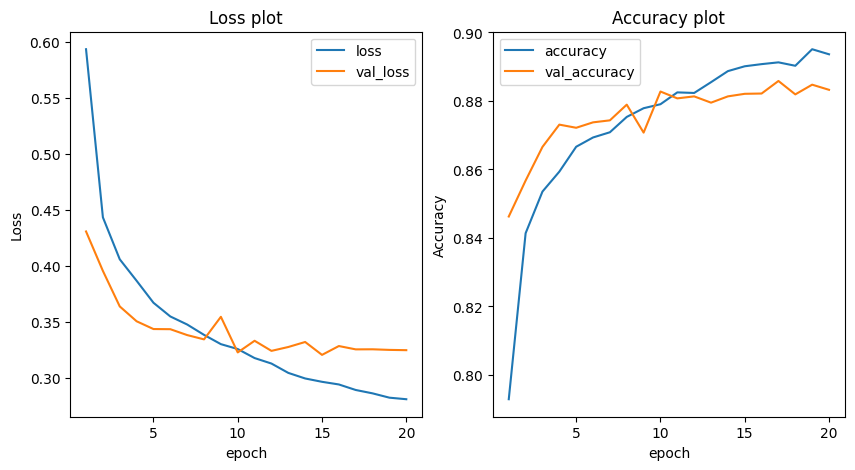

In [45]:
checkpt_cb = ModelCheckpoint(model_path+'fmnist_best_model.keras')
model = build_model(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, verbose=0, validation_data=[X_val, y_val],
          callbacks=[checkpt_cb])
print('Dropout=0.3, optimizer="adam", epoch=20일때')
for item in history.history.keys():
    print(f'{item}:{history.history[item][-1]:.4f}', end=' ')
print()
draw_loss_val_plot(history)

####  저장된 최상의 검증 점수를 낸 모델을 다시 읽어 예측하기

In [46]:
new_model = keras.models.load_model(model_path+'fmnist_best_model.keras')
loss, acc = new_model.evaluate(X_val, y_val)
loss, acc

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.8832 - loss: 0.3247


(0.3247322142124176, 0.8832499980926514)

### 조기 종료 콜백 : EearlyStopping

- 과대적합이 되기 전에 훈련을 미리 중지하는 것
    - 검증점수가 더 이상 감소하지 않고 상승하여 과대적합이 일어나면 훈련을 계속 진행하지 않고 멈추는 기법
- 계산 비용과 시간 절약
- 훈련 에포크 횟수를 제한하는 역할로 과대적합을 예방 -> 규제 방법 중 하나


- 형식 : keras.callbacks.EarlyStopping(monitor='val_loss', patient, restore_best_weights=False)
    - patience : 검증 점수가 향상되지 않더라도 지속할 수 있는 최대 에포크 횟수
    - restore_best_weights : 최상의 모델 가중치를 복원할지 지정
        - True 인 경우 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
        - 기본값은 False

#### EarlyStopping 콜백과 ModelCheckpoint 콜백을 사용한 모델

In [47]:
from keras.callbacks import EarlyStopping

accuracy:0.8901 loss:0.2940 val_accuracy:0.8835 val_loss:0.3287 


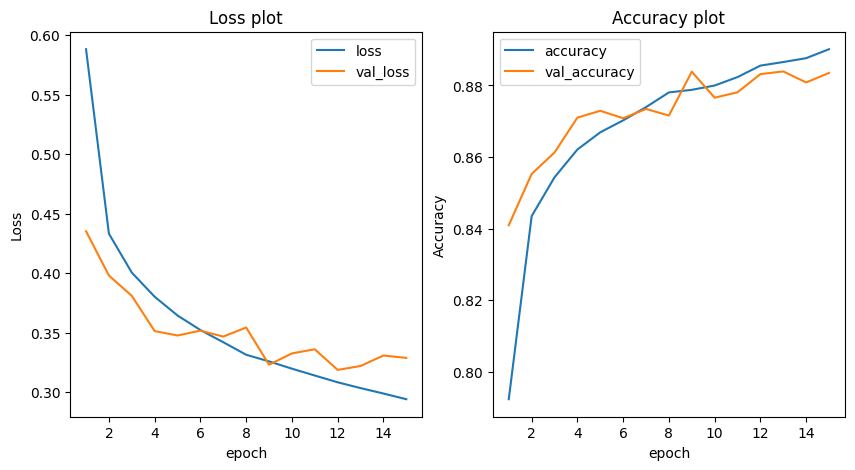

In [48]:
checkpt_cb = ModelCheckpoint(model_path+'fmnist_best_model2.keras')
earlystop_cb = EarlyStopping(patience=3, restore_best_weights=True)
model = build_model(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, verbose=0, validation_data=[X_val, y_val],
          callbacks=[checkpt_cb, earlystop_cb])
for item in history.history.keys():
    print(f'{item}:{history.history[item][-1]:.4f}', end=' ')
print()
draw_loss_val_plot(history)

#### 콜백 객체의 속성 확인

In [49]:
earlystop_cb.stopped_epoch

14

[결과]
- 7번째 에포크에서 가장 낮은 손실을 기록했고, 10번째 에포크에서 훈련이 중지됨
- 조기종료를 사용하면 에포크수를 크게 지정하여 좋은 성능을 내는 모델을 찾을 수 있음
- ModelCheckpoint콜백과 Earlystopping 콜백을 함께 사용하면 최상의 모델을 자동으로 저장해줌
- patience값을 얼마나 지정해주느냐에따라

#### 조기 종료로 얻은 모델을 사용하여 검증 세트의 성능 확인

In [50]:
loss, acc = new_model.evaluate(X_val, y_val)
loss, acc

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8832 - loss: 0.3247


(0.3247322142124176, 0.8832499980926514)

In [51]:
import pandas as pd
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.792271,0.588176,0.840917,0.435201
1,0.843458,0.433109,0.855250,0.397940
2,0.854312,0.400438,0.861250,0.380884
3,0.862083,0.380104,0.871000,0.351251
4,0.866896,0.364358,0.872917,0.347559
5,0.870229,0.352129,0.870833,0.351628
6,0.873937,0.341890,0.873417,0.346632
7,0.878042,0.331360,0.871583,0.354259
8,0.878771,0.325797,0.883833,0.322997
9,0.879979,0.319656,0.876583,0.332507


---

### 확인문제

1. 케라스 모델의 fit() 메서드에 검증 세트를 올바르게 전달하는 코드는 무엇인가?  4                    

    ① model.fit(... , val_input=val_input, val_target=val_target)       
    ② model.fit(... , validation_input=val_input, validation_target=val_target)       
    ③ model.fit(... , val_data=(val_input, val_target))  
    ④ model.fit(... , validation_data=(val_input, val_target))       

2. 이전 층의 뉴런 출력 중 70%만 사용하기 위해 드롭아웃 층을 추가하려고 한다. 옳게 설정한 것은? 2                        

    ① Dropout(0.7)    
    ② Dropout(0.3)  
    ③ Dropout(1/0.7)  
    ④ Dropout(1/0.3)

3. 케라스 모델의 가중치만 저장하는 메서드는 무엇인가?3                                  

    ① save()    
    ② load_model()  
    ③ save_weights()  
    ④ load_weights()      

4. 케라스의 조기 종료 콜백을 사용하려고 한다. 3번의 에포크 동안 손실이 감소되지 않으면 종료하고 최상의 모델 가중치를 복원하도록 설정한 것은 무엇인가?2                

    ① EarlyStopping(monitor='loss', patience=3)  
    ② EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  
    ③ EarlyStopping(monitor='accuracy', patience=3)  
    ④ EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)  

### [마무리]

- 드롭아웃(Dropout) 
- 콜백(Callback)
- 조기종료

### [핵심패키지와 함수]

**TensorFlow**

- Dropout : 드롭아웃 층
- save_weights() : 모든 층의 가중치와 절편을 파일에 저장
- load_weights() : save_weights()로 저장된 파일 읽기
- save() : 모델 구조와 모든 가중치와 절편을 파일에 저장
- load_model() : model.save()로 저장된 모델 로드
- ModelCheckpoint : 케라스 모델과 가중치를 일정 간격으로 저장
- EarlyStopping :관심 지표가 더 이상 향상하지 않으면 훈련을 중지

**Numpy**
- agrmax : 배열에서 축을 따라 최대값의 인덱스 반환